# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [143]:
import numpy as np
import pandas as pd
import sklearn.metrics
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [144]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7 


  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [145]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [146]:
def normal_equation(X, y):
  return np.linalg.pinv(X) @ y  

def linear_prediction(X, w):
  return np.sum(X * w, axis=1)

def mse_error(y, y_pred):
  return ((y_pred - y) ** 2).mean()

def mae_error(y_true, y_pred):
  return np.mean(np.absolute(y_true - y_pred))

In [ ]:
X_train_bais = np.hstack((X_train, np.ones((len(X_train), 1))))
X_test_bais = np.hstack((X_test, np.ones((len(X_test), 1))))

w = normal_equation(X_train_bais, y_train)

print(f'MSE of train sample -  {mse_error(linear_prediction(X_train_bais, w), y_train)}.') 
print(f'MSE of train sample -  {sklearn.metrics.mean_squared_error(linear_prediction(X_train_bais, w), y_train)}, using sklearn lib.')
print(f'MSE of test sample -  {mse_error(linear_prediction(X_test_bais, normal_equation(X_test_bais, y_train)), y_test)}.') 
print(f'MSE of test sample -  {sklearn.metrics.mean_squared_error(linear_prediction(X_test_bais, w), y_test)}, using sklearn lib.')

print(f'MSE of train sample -  {mae_error(linear_prediction(X_train_bais, w), y_train)}.') 
print(f'MSE of train sample -  {sklearn.metrics.mean_absolute_error(linear_prediction(X_train_bais, w), y_train)}, using sklearn lib.')
print(f'MSE of test sample -  {mae_error(linear_prediction(X_test_bais, w), y_test)}.') 
print(f'MSE of test sample -  {sklearn.metrics.mean_absolute_error(linear_prediction(X_test_bais, w), y_test)}, using sklearn lib.')



MSE of train sample -  88.38884166243399.
MSE of train sample -  88.38884166243399, using sklearn lib.
MSE of test sample -  73.83664028791583.
MSE of test sample -  78.55672064882157, using sklearn lib.
MSE of train sample -  7.628261772167122.
MSE of train sample -  7.628261772167122, using sklearn lib.
MSE of test sample -  7.260834471561127.
MSE of test sample -  7.260834471561127, using sklearn lib.


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [147]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

w - -0.3198711154043415, b - 1.9764676389198275.
MSE -  0.27829170260548786.
MAE -  0.43390397291149.


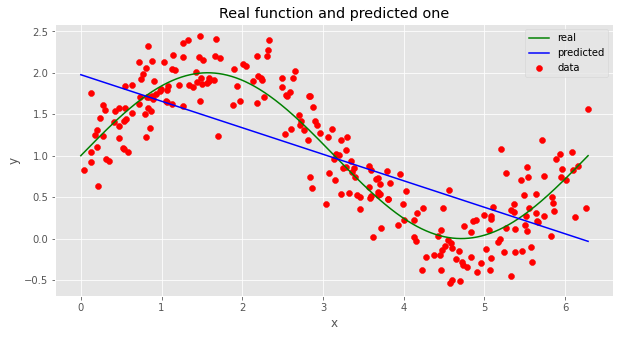

In [148]:
X_train = data['x_train'].reshape(-1, 1)
X_train_bais = np.hstack((X_train, np.ones((len(X_train), 1))))
X_support = data['support'].reshape(-1, 1)
X_support_bias = np.hstack((X_support, np.ones((len(X_support), 1))))
y_train = data['y_train']

w = normal_equation(X_train_bais, y_train)
print(f'w - {w[0]}, b - {w[1]}.')

print(f'MSE -  {mse_error(linear_prediction(X_train_bais, w), y_train)}.') 
print(f'MAE -  {mae_error(linear_prediction(X_train_bais, w), y_train)}.')

plt.figure(figsize=(10, 5))
plt.plot(data['support'], data['values'], color="green", label="real")
plt.scatter(data['x_train'], data['y_train'], color='red', label='data')
plt.title('Real function and predicted one')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], linear_prediction(X_support_bias, w), color="blue", label='predicted')
plt.legend(loc='upper right')
plt.show()


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

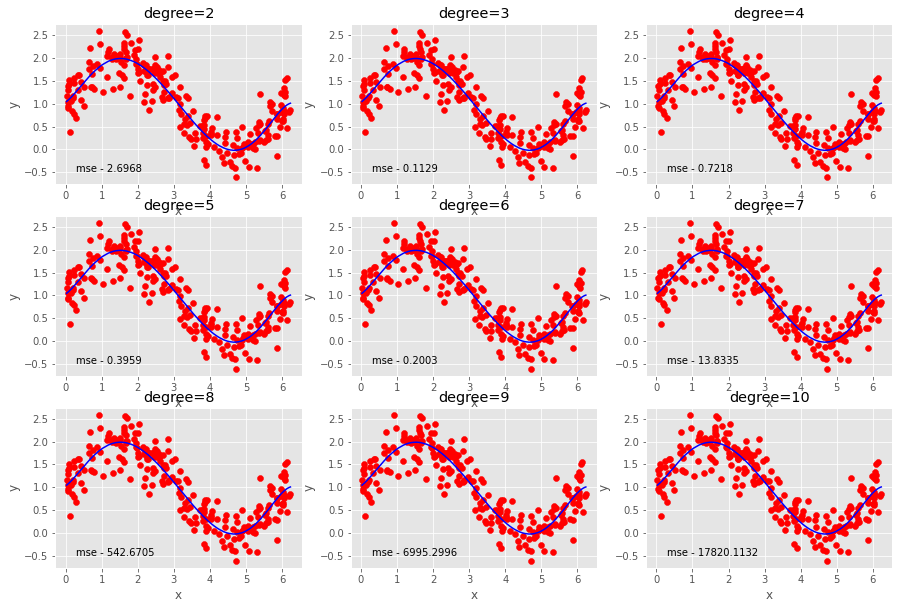

In [ ]:
X_train = np.reshape(data['x_train'], (len(data['x_train']), 1))
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i in range(0, 9):
    ax = axs[i // 3, i % 3]

    polynomial_regression = Pipeline([('polynomial_features', PolynomialFeatures(degree=i + 2)),('linear_regression', LinearRegression())])
    mse = -cross_val_score(polynomial_regression, data['x_train'].reshape(-1, 1), data['y_train'], scoring='neg_mean_squared_error', cv=5).mean()

    ax.scatter(data['x_train'], data['y_train'], color='red')
    ax.plot(data['x_train'], pred_y, color='blue')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.text(0.3, -0.5, f'mse - {mse:.4f}')
    ax.set(title=f'degree={i + 2}')
    

Больше всего подходит полином степени 3, полином большей степени выдает хуже результат на кросс-валидации, так как модель начинает переобучаться.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

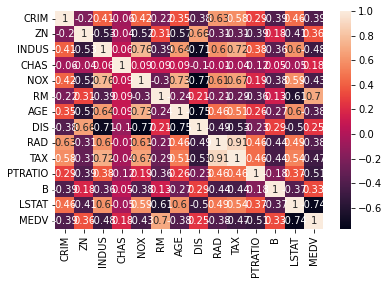

In [ ]:
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = pd.DataFrame(house_data.data, columns=house_data.feature_names)
boston['MEDV'] = house_data.target
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию.

Замечания:
Чтобы соответствовать модели линейной регрессии, мы выбираем те особенности, которые имеют высокую корреляцию с нашей целевой переменнойMEDV, Глядя на матрицу корреляции, мы видим, чтоRMимеет сильную положительную корреляцию сMEDV(0,7) где какLSTATимеет высокую отрицательную корреляцию сMEDV(-0,74).
Важным моментом при выборе признаков для модели линейной регрессии является проверка на мультиколлинеарность. ОсобенностиRAD,TAXиметь соотношение 0,91. Эти пары признаков сильно связаны друг с другом. Мы не должны выбирать обе эти функции вместе для обучения модели.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['ZN'], boston['CRIM'], boston['B']], \
                 columns = ['LSTAT','RM', 'PTRATIO', 'INDUS', 'ZN', 'CRIM', 'B' ])

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_test)
print(f'MSE of smaller dataset - {mean_squared_error(Y_test, y_train_predict)}.')
print(f'MAE of smaller dataset - {mean_absolute_error(Y_test, y_train_predict)}.')

MSE of smaller dataset - 41.776708031575275.
MAE of smaller dataset - 4.2782616948894265.


In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_prediction = model.predict(X_test)
print(f'MSE of initail dataset - {mean_squared_error(y_test, y_test_prediction)}.')
print(f'MAE of initail dataset - {mean_absolute_error(y_test, y_test_prediction)}.')

MSE of initail dataset - 33.448979997676524.
MAE of initail dataset - 3.842909220444496.
